### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("3.10_non_linear.csv")
df.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [3]:
def generate_degrees(source_data: list, n: int):
    return np.array([
        source_data**i for i in range(1, n+1)
    ]).T

In [4]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [34]:
def degree_info(feature, answer, n):
    X = generate_degrees(feature, n)
    reg = LinearRegression().fit(X, answer)
    y_predict = reg.predict(X)
    error = r2_score(answer, y_predict)
    return error

def grid_search(feature, answer, n_max: int):
    error_result = -100000
    degree = 0
    for i in range(1, n_max + 1):
        error = degree_info(feature, answer, i)
        print(f"Degree: {i}, error: {error:.3f}")
        if error > error_result:
            error_result = error
            degree = i
    return degree, error_result

In [35]:
degree, error = grid_search(df.x_train, df.y_train, 25)
print(f"Best Degree: {degree}, error: {error:.3f}")

Degree: 1, error: 0.519
Degree: 2, error: 0.533
Degree: 3, error: 0.888
Degree: 4, error: 0.895
Degree: 5, error: 0.896
Degree: 6, error: 0.899
Degree: 7, error: 0.900
Degree: 8, error: 0.909
Degree: 9, error: 0.909
Degree: 10, error: 0.909
Degree: 11, error: 0.909
Degree: 12, error: 0.911
Degree: 13, error: 0.914
Degree: 14, error: 0.916
Degree: 15, error: 0.916
Degree: 16, error: 0.912
Degree: 17, error: 0.909
Degree: 18, error: 0.910
Degree: 19, error: 0.901
Degree: 20, error: 0.895
Degree: 21, error: 0.880
Degree: 22, error: 0.833
Degree: 23, error: 0.833
Degree: 24, error: 0.834
Degree: 25, error: 0.834
Best Degree: 14, error: 0.916


**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов.

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [18]:
from numpy.linalg import inv

In [70]:
class CustomLinearReg:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        X_temp = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        self.w = (
            inv(
                (X_temp.T).dot(X_temp)
            )
            .dot(X_temp.T)
            .dot(y)
        )

    def predict(self, X):
        X_temp = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        return X_temp.dot(self.w)

In [85]:
degree = 10
X = generate_degrees(df.x_train, degree)
c_reg = CustomLinearReg()
c_reg.fit(X, df.y_train)
y_predict = c_reg.predict(X)
error = r2_score(df.y_train, y_predict)
#np.array([df.y_train, y_predict]).reshape(-1,2)
print(f"Best Degree: {degree}, error: {error:.3f}")

Best Degree: 10, error: 0.909


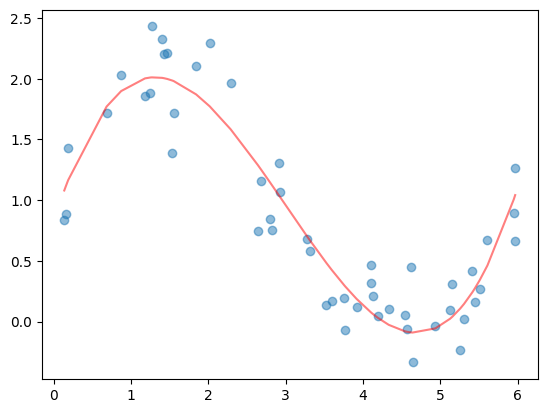

In [74]:
plt.scatter(df.x_train, df.y_train, alpha=0.5)
plt.plot(df.x_train, y_predict, alpha=0.5, color="r")
plt.show()

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
df = pd.read_csv("boston.csv", sep=";")
df.shape

(506, 14)

In [112]:
y = df.MEDV

In [113]:
X = df.drop("MEDV", axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [114]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [117]:
reg_1 = LinearRegression().fit(X_train, y_train)
y1_pred = reg_1.predict(X_test)
print(f"Error r2: {r2_score(y_test, y1_pred):.3f}")

Error r2: 0.653


In [123]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [130]:
Xz_train = StandardScaler().fit_transform(X_train)
Xz_train

array([[-0.22287954, -0.47898344,  1.19281038, ..., -1.71345175,
         0.39021593, -1.50506664],
       [-0.42123097, -0.47898344, -0.98057072, ...,  0.16004583,
         0.34955796, -0.29224923],
       [-0.01786666, -0.47898344,  0.98105238, ...,  0.79977671,
        -0.36333911,  0.19654013],
       ...,
       [-0.36135495, -0.47898344, -0.72159641, ..., -0.47968505,
         0.35232311, -1.42759282],
       [-0.42244575,  3.58948713, -1.22523706, ..., -1.71345175,
         0.39984276, -1.36983961],
       [-0.42109453, -0.47898344, -1.29677693, ...,  0.11435076,
         0.44162727, -1.36138792]])

In [131]:
Xz_test = StandardScaler().fit_transform(X_test)
Xz_test.shape, X_test.shape

((102, 13), (102, 13))

In [132]:
reg_2 = LinearRegression().fit(Xz_train, y_train)
y2_pred = reg_2.predict(Xz_test)
print(f"Error r2: {r2_score(y_test, y1_pred):.3f}")
print(f"z Error r2: {r2_score(y_test, y2_pred):.3f}")

Error r2: 0.653
z Error r2: 0.596
